Magnetic Spectrometer Code Analysis
Author: Jason Cardarelli
2019

Normalized Units for Code:
The code is normalized to the base units of m, e, c, e, and $\omega_{c0}=q B_0/m$. This is similar to the OSIRIS unit system, but with $\omega_{c0}$, the cyclotron frequency of the central longitudinal energy, replacing $\omega_p$. The corrections to measures are as follows: <br>
$t'= t*\omega_{c0}$ <br>
$x'= x*\omega_{c0}/c$ <br>
$B'= B*e/(c*m*\omega_{c0}) = B/B_0$ <br>
$Energy' = Energy/(mc^2) = \gamma$ <br>

In [17]:
!pwd
%cd ../source_code/
!make
!./run
%cd ../data/

/Users/jcardar/research/mag_spec/data
/Users/jcardar/research/mag_spec/source_code
g++  -c -o obj/mag_spec_tracker.o mag_spec_tracker.cpp -Iinclude -std=c++17
g++  -o run obj/mag_spec_tracker.o obj/particle.o obj/screen.o obj/magnet.o obj/my_functions.o -Iinclude -std=c++17
particle number 1
particle number 2
particle number 3
particle number 4
particle number 5
/Users/jcardar/research/mag_spec/data


In [100]:
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import csv
import numpy as np
import itertools
import math
#import tabulate

#NORMALIZING UNIT SYSTEM:
E0 = 1000            #MeV
B0 = 1               #T
qe = 1.602*10**-19   #C
me = 9.11* 10**-31   #kg
c  = 299792458       #m/s
gamma0 = (E0+0.511)/0.511


omegaNorm  = (qe*B0)/(me)
lengthNorm = omegaNorm/c


v_perp0  = c*((1-(1/(gamma0*gamma0)))**0.5)
rL0_real = gamma0*me*v_perp0/(qe*B0)
rL0_BAR  = rL0_real*lengthNorm


cm_30    = 0.3*lengthNorm
cm_20    = 0.2*lengthNorm
cm_10    = 0.1*lengthNorm
cm_03    = 0.03*lengthNorm


#display('qe         = %.3E' % qe)
#display('me         = %.3E' % me)
#display('c          = %.3E' % c)
display('omegaNorm  = %.3E' % omegaNorm)
#display('lengthNorm = %.3E' % lengthNorm)
display('gamma0     = %.3f' % gamma0)
display("rL0_BAR    = %.3f" % rL0_BAR)
display("rL0_real   = %.3f" % rL0_real)
display("30 cm      = %.3f" % cm_30)
display("10 cm      = %.3f" % cm_10)
display("3 cm       = %.3f" % cm_03)

'omegaNorm  = 1.759E+11'

'gamma0     = 1957.947'

'rL0_BAR    = 1957.947'

'rL0_real   = 3.338'

'30 cm      = 175.972'

'10 cm      = 58.657'

'3 cm       = 17.597'

In [84]:
#Run .cpp code
num_mag    = 1
num_par    = 10
num_screen = 1

#magnet input: Bx, By, Bz, x, y, z, length, width, height
def mag_switch(num_mag):
    mag_switcher = ...
    {
        1: ["0", "0", "1", "0.0", "0.0", "0.0", "175.972", "58.657", "17.597"]
    }
    if num_mag > 2:
        mag_switcher.update()
        
    mag_list = mag_switch(num_mag, "Invalid")
    print(*mag_list)

def screen_switch(num_screen):
    screen_switcher = {
        1: ""
    }
    
mag_switch(num_mag)

TypeError: mag_switch() takes 1 positional argument but 2 were given

In [101]:
def gen_rows(stream, max_length=None):
      rows = csv.reader(stream)
      if max_length is None:
          rows = list(rows)
          max_length = max(len(row) for row in rows)
      for row in rows:
          yield row + [np.nan] * (max_length - len(row))

In [102]:
with open("XPOS.csv") as csvfile:
    posx = pd.DataFrame.from_records(list(gen_rows(csvfile)))
    posx = posx.applymap(lambda x : float(x))
    del posx[0]

In [103]:
with open("YPOS.csv") as csvfile:
    posy = pd.DataFrame.from_records(list(gen_rows(csvfile)))
    del posy[0]
    posy = posy.applymap(lambda x : float(x))

In [104]:
with open("ZPOS.csv") as csvfile:
    posz = pd.DataFrame.from_records(list(gen_rows(csvfile)))
    del posz[0]
    posz = posz.applymap(lambda x : float(x))

In [39]:
with open("MOMENTUM_X.csv") as csvfile:
   px = pd.DataFrame.from_records(list(gen_rows(csvfile)))
   del px[0]
   px = px.applymap(lambda x : float(x))

In [40]:
with open("MOMENTUM_Y.csv") as csvfile:
    py = pd.DataFrame.from_records(list(gen_rows(csvfile)))
    del py[0]
    py = py.applymap(lambda x : float(x))

In [41]:
with open("MOMENTUM_Z.csv") as csvfile:
    pz = pd.DataFrame.from_records(list(gen_rows(csvfile)))
    del pz[0]
    pz = pz.applymap(lambda x : float(x))

KeyboardInterrupt: 

In [105]:
with open("TIME.csv") as csvfile:
    time = pd.DataFrame.from_records(list(gen_rows(csvfile)))
    time = time.applymap(lambda x : float(x))

In [106]:
with open("ENERGY.csv") as csvfile:
    energy = pd.DataFrame.from_records(list(gen_rows(csvfile)))
    del energy[0]
    energy = energy.applymap(lambda x : float(x))

In [107]:
magnet = pd.read_csv("MAGNETS.csv")

In [108]:
screen = pd.read_csv("SCREENS.csv")

In [109]:
del_time = pd.read_csv("DEL_T.csv", dtype=float, header = -1)

In [110]:
plot_real_units = True

plot_pos = True
plot_mom = False
plot_lamour_radius = True
plot_magnet = True
plot_screen = True

<IPython.core.display.Javascript object>


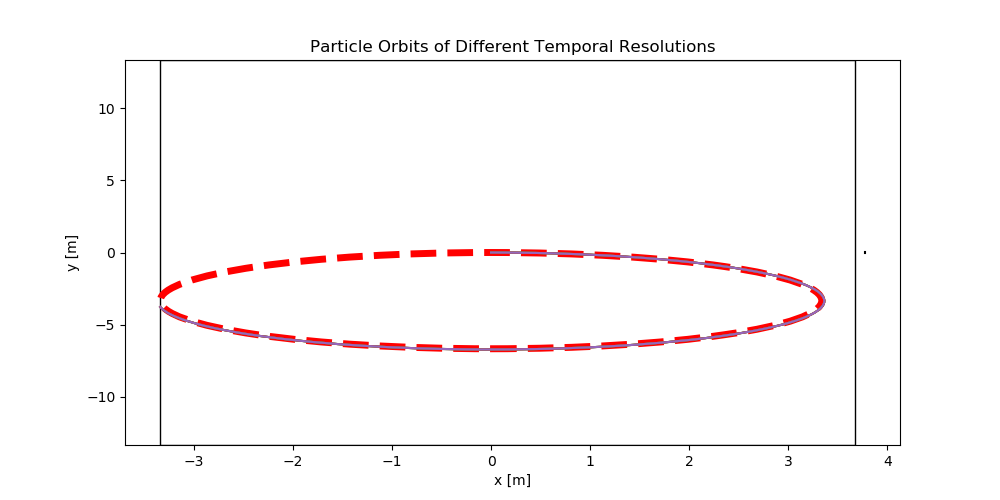

Text(0.5, 1.0, 'Particle Orbits of Different Temporal Resolutions')

In [112]:
num_par    = px.shape[0]
num_mag    = magnet.shape[0]
num_screen = screen.shape[0]

%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 5]
fig,ax = plt.subplots(1)

if plot_pos == True:
    for ii in range(num_par):
        if plot_real_units == True:
            plt.plot(posx.iloc[ii]/lengthNorm,posy.loc[ii]/lengthNorm,label='Energy = %.2f MeV' % (float(energy.iloc[ii][1])*0.511-0.511))
        else:
            plt.plot(posx.iloc[ii],posy.iloc[ii],label='Energy = %.3f MeV, del_t = %.2f $\omega_{c0}$' % (energy.iloc[ii][1]*0.511-0.511, del_time.loc[ii][0]))
        
if plot_mom == True:
    for ii in range(num_par):
        if plot_real_units == True:
            plt.subplot(floor(num_par/2),ceil(num_par/2),ii+1)
            plt.plot(px.iloc[ii]/lengthNorm,py.loc[ii]/lengthNorm,label='Energy = %.3f MeV' % (float(energy.iloc[ii][1])*0.511))
        else:
            plt.subplot(math.floor(num_par/2),math.ceil(num_par/2),ii+1)
            plt.plot(px.iloc[ii]+10*ii,py.iloc[ii]+10*ii,label='Energy = \n %.3f MeV \n del_t = \n %.2f $\omega_{c0}$' % (energy.iloc[ii][1], del_time.loc[ii][0]))
            plt.legend()
            plt.xlabel('$p_x /(c m)$')
            plt.ylabel('$p_y /(c m)$')
    
if plot_screen == True:
    for ii in range(num_screen):
        screenX = np.array([screen.iloc[ii][1],screen.iloc[ii][1]+(screen.iloc[ii][5]*np.cos(np.radians(screen.iloc[ii][4])))])
        screenY = np.array([screen.iloc[ii][2],screen.iloc[ii][2]+(screen.iloc[ii][5]*np.sin(np.radians(screen.iloc[ii][4])))])
        if plot_real_units == True:
            plt.plot(screenX/lengthNorm,screenY/lengthNorm,'-k')
        else:
            plt.plot(screenX,screenY,'-k')
        
if plot_magnet == True:
    for ii in range(num_mag):
        if plot_real_units == True:
            rect = patches.Rectangle((magnet.iloc[ii][2]/lengthNorm,(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2))/lengthNorm),magnet.iloc[ii][5]/lengthNorm,magnet.iloc[ii][6]/lengthNorm,linewidth=1,edgecolor='k',facecolor='none')
            plt.ylim((magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01)/lengthNorm,(magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01)/lengthNorm)
        else:
            rect = patches.Rectangle((magnet.iloc[ii][2],magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)),magnet.iloc[ii][5],magnet.iloc[ii][6],linewidth=1,edgecolor='k',facecolor='none')
            plt.ylim(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01,magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01)
        ax.add_patch(rect)
        plt.xlim()

if plot_lamour_radius == True:
    if plot_real_units == True:
        rL_BAR_circ = plt.Circle((0, -rL0_BAR/lengthNorm), rL0_BAR/lengthNorm, color='r', fill = False, lw=5, ls ='--', label='RL0')
    else:
        rL_BAR_circ = plt.Circle((0, -rL0_BAR), rL0_BAR, color='r', fill = False, lw=3, ls ='--', label='analytic RL0')
    ax.add_patch(rL_BAR_circ)

ax.legend(loc='upper right',bbox_to_anchor=(1.44, 1.05))
if plot_real_units:
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
#else:
    #plt.xlabel('$p_x \omega_{c0} / c$')
    #plt.ylabel('$p_y \omega_{c0} / c$')
#plt.autoscale('both')
plt.title('Particle Orbits of Different Temporal Resolutions')

In [20]:
# fig, ax = plt.subplots(math.floor(num_par/2),math.ceil(num_par/2),sharex=True,sharey=True)
# for ii in range(num_par):
#         if plot_real_units == True:
#             plt.subplot(math.floor(num_par/2),math.ceil(num_par/2),ii+1)
#             plt.plot(px.iloc[ii]/lengthNorm,py.loc[ii]/lengthNorm,label='Energy = %.1f MeV' % (float(energy.iloc[ii][1])*0.511-0.511))
#         else:
#             plt.subplot(math.floor(num_par/2),math.ceil(num_par/2),ii+1)
#             plt.plot(px.iloc[ii],py.iloc[ii],label='Energy = \n %.3f MeV \n del_t = \n %.2f $\omega_{c0}$' % (energy.iloc[ii][1], del_time.loc[ii][0]))
#             plt.legend()
#             plt.xlabel('$p_x /(c m)$')
#             plt.ylabel('$p_y /(c m)$')

In [21]:
# fig, ax = plt.subplots(1)
# for ii in range(num_par):
#         if plot_real_units == True:
#             #plt.subplot(floor(num_par/2),ceil(num_par/2),1)
#             plt.plot(px.iloc[ii]/lengthNorm,py.loc[ii]/lengthNorm,label='Energy = %.1f MeV' % (float(energy.iloc[ii][1])*0.511-0.511))
#         else:
#             #plt.subplot(math.floor(num_par/2),math.ceil(num_par/2),ii+1)
#             plt.plot(px.iloc[ii],py.iloc[ii],label='Energy = \n %.3f MeV \n del_t = \n %.2f $\omega_{c0}$' % (energy.iloc[ii][1]*0.511-0.511, del_time.loc[ii][0]))
#             ax.legend(loc='upper right',bbox_to_anchor=(1.2, 1.03))
#             plt.xlabel('$p_x /(c*m_e)$')
#             plt.ylabel('$p_y /(c*m_e)$')
#             plt.axis('equal')

In [22]:
# fig, ax = plt.subplots(1)
# for ii in range(num_par):
#         if plot_real_units == True:
#             #plt.subplot(floor(num_par/2),ceil(num_par/2),1)
#             plt.plot(px.iloc[ii]/lengthNorm,py.loc[ii]/lengthNorm,label='Energy = %.1f MeV' % (float(energy.iloc[ii][1])*0.511-0.511))
#         else:
#             #plt.subplot(math.floor(num_par/2),math.ceil(num_par/2),ii+1)
#             plt.plot(posx.iloc[ii],px.iloc[ii],label='Energy = \n %.3f MeV \n del_t = \n %.2f $\omega_{c0}$' % (energy.iloc[ii][1]*0.511-0.511, del_time.loc[ii][0]))
#             ax.legend(loc='upper right',bbox_to_anchor=(1.2, 1.03))
#             plt.xlabel('$x*(c/\omega_{c0})^{-1}$')
#             plt.ylabel('$p_x*(c*m_e)^{-1}$')
#             plt.axis('equal')

In [23]:
# plt.rcParams['figure.figsize'] = [20, 20]
# fig, ax = plt.subplots(1,3)
# print(ax)
# plt.subplot(2,2,1)
# if plot_pos == True:
#     for ii in range(num_par):
#         if plot_real_units == True:
#             plt.plot(posx.iloc[ii]/lengthNorm,posy.loc[ii]/lengthNorm,label='Energy = %.3f MeV' % (float(energy.iloc[ii][1])*0.511))
#         else:
#             plt.plot(posx.iloc[ii],posy.iloc[ii],label='Energy = %.3f MeV, del_t = %.2f $\omega_{c0}$' % (energy.iloc[ii][1]*0.511-0.511, del_time.loc[ii][0]))
#             plt.xlabel('$x \omega_{c0} / c$')
#             plt.ylabel('$y \omega_{c0} / c$')
#     plt.legend(loc='upper right',bbox_to_anchor=(2, 1.03))
        
# if plot_mom == True:
#     for ii in range(num_par):
#         if plot_real_units == True:
#             plt.subplot(floor(num_par/2),ceil(num_par/2),ii+1)
#             plt.plot(px.iloc[ii]/lengthNorm,py.loc[ii]/lengthNorm,label='Energy = %.3f MeV' % (float(energy.iloc[ii][1])*0.511))
#         else:
#             plt.subplot(math.floor(num_par/2),math.ceil(num_par/2),ii+1)
#             plt.plot(px.iloc[ii]+10*ii,py.iloc[ii]+10*ii,label='Energy = \n %.3f MeV \n del_t = \n %.2f $\omega_{c0}$' % (energy.iloc[ii][1], del_time.loc[ii][0]))
#             plt.legend()
#             plt.xlabel('$p_x /(c m)$')
#             plt.ylabel('$p_y /(c m)$')
    
# if plot_screen == True:
#     for ii in range(num_screen):
#         screenX = np.array([screen.iloc[ii][1],screen.iloc[ii][1]+(screen.iloc[ii][5]*np.cos(np.radians(screen.iloc[ii][4])))])
#         screenY = np.array([screen.iloc[ii][2],screen.iloc[ii][2]+(screen.iloc[ii][5]*np.sin(np.radians(screen.iloc[ii][4])))])
#         if plot_real_units == True:
#             plt.plot(screenX/lengthNorm,screenY/lengthNorm,'-k')
#         else:
#             plt.plot(screenX,screenY,'-k')
        
# # if plot_magnet == True:
# #     for ii in range(num_mag):
# #         if plot_real_units == True:
# #             rect = patches.Rectangle((magnet.iloc[ii][2]/lengthNorm,(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2))/lengthNorm),magnet.iloc[ii][5]/lengthNorm,magnet.iloc[ii][6]/lengthNorm,linewidth=1,edgecolor='k',facecolor='none')
# #             ax[0].ylim((magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01)/lengthNorm,(magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01)/lengthNorm)
# #         else:
# #             rect = patches.Rectangle((magnet.iloc[ii][2],magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)),magnet.iloc[ii][5],magnet.iloc[ii][6],linewidth=1,edgecolor='k',facecolor='none')
# #             plt.ylim(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01,magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01)
# #         ax[0].add_patch(rect)
# #         plt.xlim()
        
# plt.subplot(2,2,3)
# for ii in range(num_par):
#         if plot_real_units == True:
#             #plt.subplot(floor(num_par/2),ceil(num_par/2),1)
#             plt.plot(px.iloc[ii]/lengthNorm,py.loc[ii]/lengthNorm,label='Energy = %.1f MeV' % (float(energy.iloc[ii][1])*0.511-0.511))
#         else:
#             #plt.subplot(math.floor(num_par/2),math.ceil(num_par/2),ii+1)
#             plt.plot(px.iloc[ii],py.iloc[ii],label='Energy = \n %.3f MeV \n del_t = \n %.2f $\omega_{c0}$' % (energy.iloc[ii][1]*0.511-0.511, del_time.loc[ii][0]))
#             #plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.03))
#             plt.xlabel('$p_x /(c*m_e)$')
#             plt.ylabel('$p_y /(c*m_e)$')
#             ax[1].axis('equal')
            
# plt.subplot(2,2,4)
# for ii in range(num_par):
#         if plot_real_units == True:
#             #plt.subplot(floor(num_par/2),ceil(num_par/2),1)
#             plt.plot(px.iloc[ii]/lengthNorm,py.loc[ii]/lengthNorm,label='Energy = %.1f MeV' % (float(energy.iloc[ii][1])*0.511-0.511))
#         else:
#             #plt.subplot(math.floor(num_par/2),math.ceil(num_par/2),ii+1)
#             plt.plot(posx.iloc[ii],px.iloc[ii],label='Energy = \n %.3f MeV \n del_t = \n %.2f $\omega_{c0}$' % (energy.iloc[ii][1]*0.511-0.511, del_time.loc[ii][0]))
#             #plt.legend(loc='upper right',bbox_to_anchor=(1.0, 1.03))
#             plt.xlabel('$x*(c/\omega_{c0})^{-1}$')
#             plt.ylabel('$p_x*(c*m_e)^{-1}$')
#             ax[2].axis('equal')